In [53]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint
                                        
def similarity(i,j):
    fp_i = GetMACCSKeysFingerprint((Chem.MolFromSmiles(i)))
    fp_j = GetMACCSKeysFingerprint((Chem.MolFromSmiles(j)))
    return DataStructs.FingerprintSimilarity(fp_i,fp_j)

In [2]:
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint


def similarity(i,j):
    fp_i = Chem.RDKFingerprint(Chem.MolFromSmiles(i))
    fp_j = Chem.RDKFingerprint(Chem.MolFromSmiles(j))
    return DataStructs.FingerprintSimilarity(fp_i,fp_j)

In [54]:
import pandas as pd
data = pd.read_excel('sludge400-mst.xlsx',sheet_name='33-class')


In [55]:
def standsmiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return Chem.MolToSmiles(mol,isomericSmiles=False)

In [56]:
standsmiles('C1=C(C(=CC(=C1Cl)Cl)Cl)Cl')

'Clc1cc(Cl)c(Cl)cc1Cl'

In [57]:
# prime algorithm
from random import shuffle
smiles = list(set(data['SMILES'].values))
smiles  = [standsmiles(smile) for smile in smiles]
shuffle(smiles)
n = len(smiles)
st = [0]*(n+3)
dist = [float('inf')]*(n+3)
res =0
g = [[float('inf') for _ in range(n+3)] for _ in range(n+3)]
for i in range(1,n+1):
    for j in range(i,n+1):
        c = similarity(smiles[i-1],smiles[j-1])
        g[i][j] = g[j][i]= min(g[i][j],1-c)
        
def prim():
    res =0
    for i in range(n):
        t = -1
        for j in range(1,n+1):
            if not st[j] and (t==-1 or dist[t]>dist[j]):
                t=j
        if (i and dist[t]==float('inf')): 
            return float('inf')
        if i: res+=dist[t]
        for j in range(1,n+1):
            dist[j] = min(dist[j],g[t][j])
        st[t]=1
    return res
res = prim()
print(res)

25.41172249703408


In [58]:
# Kruskal algorithm

from random import shuffle
smiles = list(set(data['SMILES'].values))
shuffle(smiles)
n = len(smiles)
st = [0]*(n+3)
edges = []
dist = [float('inf')]*(n+3)
res =0

p = list(range(n+1))
for i in range(1,n+1):
    for j in range(1,i):
        c = similarity(smiles[i-1],smiles[j-1])
        edges.append([i,j,1-c])
edges.sort(key = lambda ls: ls[-1])
def find(x):
    if p[x]!=x:p[x]= find(p[x])
    return p[x]
def union(x,y):
    if find(x)!=find(y):
        p[find(x)] =find(y)

res =0
def kruskal(edges):
    global res
    T = set()
    for edge in edges:
        u,v,c = edge
        if find(u) != find(v): 
            T.add((u, v,c)) 
            union(u, v) 
            res+=c
    return T,res
links,t_res = kruskal(edges)

In [59]:
t_res

25.411722497034088

In [62]:
links = list(links)
links.sort(key = lambda ls:ls[-1]) 

In [60]:
smiles[4],smiles[14]

('CC12CCC3C(C1CCC2O)CCC4=C3C=CC(=C4)O', 'C1=C(C=C(C(=C1O)Cl)Cl)Cl')

In [63]:
links

[(98, 10, 0.0),
 (90, 18, 0.0),
 (80, 7, 0.0),
 (95, 32, 0.0),
 (51, 9, 0.0),
 (36, 9, 0.0),
 (50, 32, 0.0),
 (96, 32, 0.0),
 (103, 9, 0.0),
 (93, 9, 0.0),
 (25, 9, 0.0),
 (86, 9, 0.0),
 (35, 12, 0.0),
 (77, 32, 0.0),
 (62, 32, 0.0),
 (82, 9, 0.0),
 (41, 9, 0.0),
 (78, 18, 0.0),
 (68, 7, 0.0),
 (27, 9, 0.0),
 (20, 7, 0.0),
 (24, 11, 0.0),
 (60, 11, 0.0),
 (84, 72, 0.0),
 (92, 7, 0.0),
 (109, 72, 0.0),
 (91, 9, 0.0),
 (31, 9, 0.0),
 (15, 9, 0.0),
 (105, 32, 0.0),
 (16, 9, 0.0),
 (63, 18, 0.0),
 (104, 32, 0.0),
 (101, 9, 0.0),
 (23, 7, 0.0),
 (81, 7, 0.0),
 (48, 5, 0.030303030303030276),
 (100, 65, 0.038461538461538436),
 (38, 12, 0.040000000000000036),
 (99, 53, 0.06666666666666665),
 (30, 21, 0.06666666666666665),
 (108, 22, 0.06976744186046513),
 (37, 30, 0.0714285714285714),
 (102, 22, 0.09090909090909094),
 (102, 42, 0.09090909090909094),
 (88, 66, 0.09230769230769231),
 (99, 2, 0.10344827586206895),
 (34, 2, 0.1071428571428571),
 (102, 61, 0.11111111111111116),
 (52, 32, 0.11111111

In [15]:
num = [[ 'yushucheng' for _ in range(112)] for _ in range(112)]
for lins in links:
    i,j,k = lins
    print(i,j)
    num[i][j] = 1-k
df = pd.DataFrame(num)
df['Smiles'] = ['ysc']+smiles
df.to_csv('./sludge_mst_smilarity.csv')


46 45
9 3
43 5
106 21
93 53
63 62
87 48
93 37
75 63
74 40
47 1
87 4
70 27
74 11
72 45
107 3
47 14
50 47
60 21
49 15
70 21
44 38
70 57
107 93
101 55
58 31
75 36
85 49
96 15
87 62
88 75
111 104
85 24
110 101
58 39
61 49
92 54
86 10
99 79
107 44
77 4
83 28
39 22
25 5
110 82
76 60
23 22
77 23
86 66
86 23
19 16
86 84
32 16
82 6
92 14
69 26
80 41
109 68
68 7
95 38
101 44
26 11
89 40
102 2
92 51
83 49
65 29
97 16
75 56
12 5
103 42
8 5
28 16
99 11
97 80
73 61
91 2
58 13
104 74
59 28
108 11
84 16
73 35
16 6
97 2
70 56
40 8
98 13
97 42
105 17
105 92
108 42
54 40
108 20
40 30
97 52
80 33
94 90
72 52
78 35
22 7
81 72
100 71
71 47
67 18
34 8
100 67
102 64
94 83
81 29


In [ ]:
# network figure

import networkx as nx
import matplotlib.pyplot as plt

n = len(links)
G = nx.DiGraph()
for i in range(1,n+1):
    G.add_node(str(i))
for edge in links[:-1]:
    G.add_edge(str(edge[0]),str(edge[1]),weight = edge[-1])
pos = nx.spring_layout(G,k=0.5,iterations =20,scale=2)
plt.figure(figsize=(18,18))
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='orange', arrows = False)

plt.show()

# ?? figure

In [2]:
import pandas as pd 
ad_matrix = pd.read_csv("sludge_mst_smilarity-modified.csv")
ad_matrix.fillna(0,inplace=True)
ad_matrix = ad_matrix.iloc[:,1:]

adjcent_matrix = ad_matrix.values

In [4]:
import networkit as nk
import networkit
import matplotlib.pyplot as plt
#Create directed graph object and to add nodes
n = len(links)+1
G = nk.Graph(n, directed=False,weighted=True)
#Add edges to the graph
n = len(adjcent_matrix)
m = len(adjcent_matrix[0])
for i in range(n):
    for j in range(n):
        if adjcent_matrix[i][j]!=0:
            G.addEdge(i,j)
            G.setWeight(i,j,adjcent_matrix[i][j])
#To see the graph structural overview
print(nk.overview(G))
plt.figure(figsize=(18,18))
#For visualization
#nodelist=d.keys(), node_size=[v * 100 for v in d.values()]

networkit.viztasks.drawGraph(G,edge_color='orange',with_labels=True,node_size= [200+10000*s for s in nk.centrality.DegreeCentrality(G,True).run().scores()],
                       )
#networkit.vizbridges.widgetFromGraph(G)
plt.show()

NameError: name 'links' is not defined

# From csv(sludge) to figure

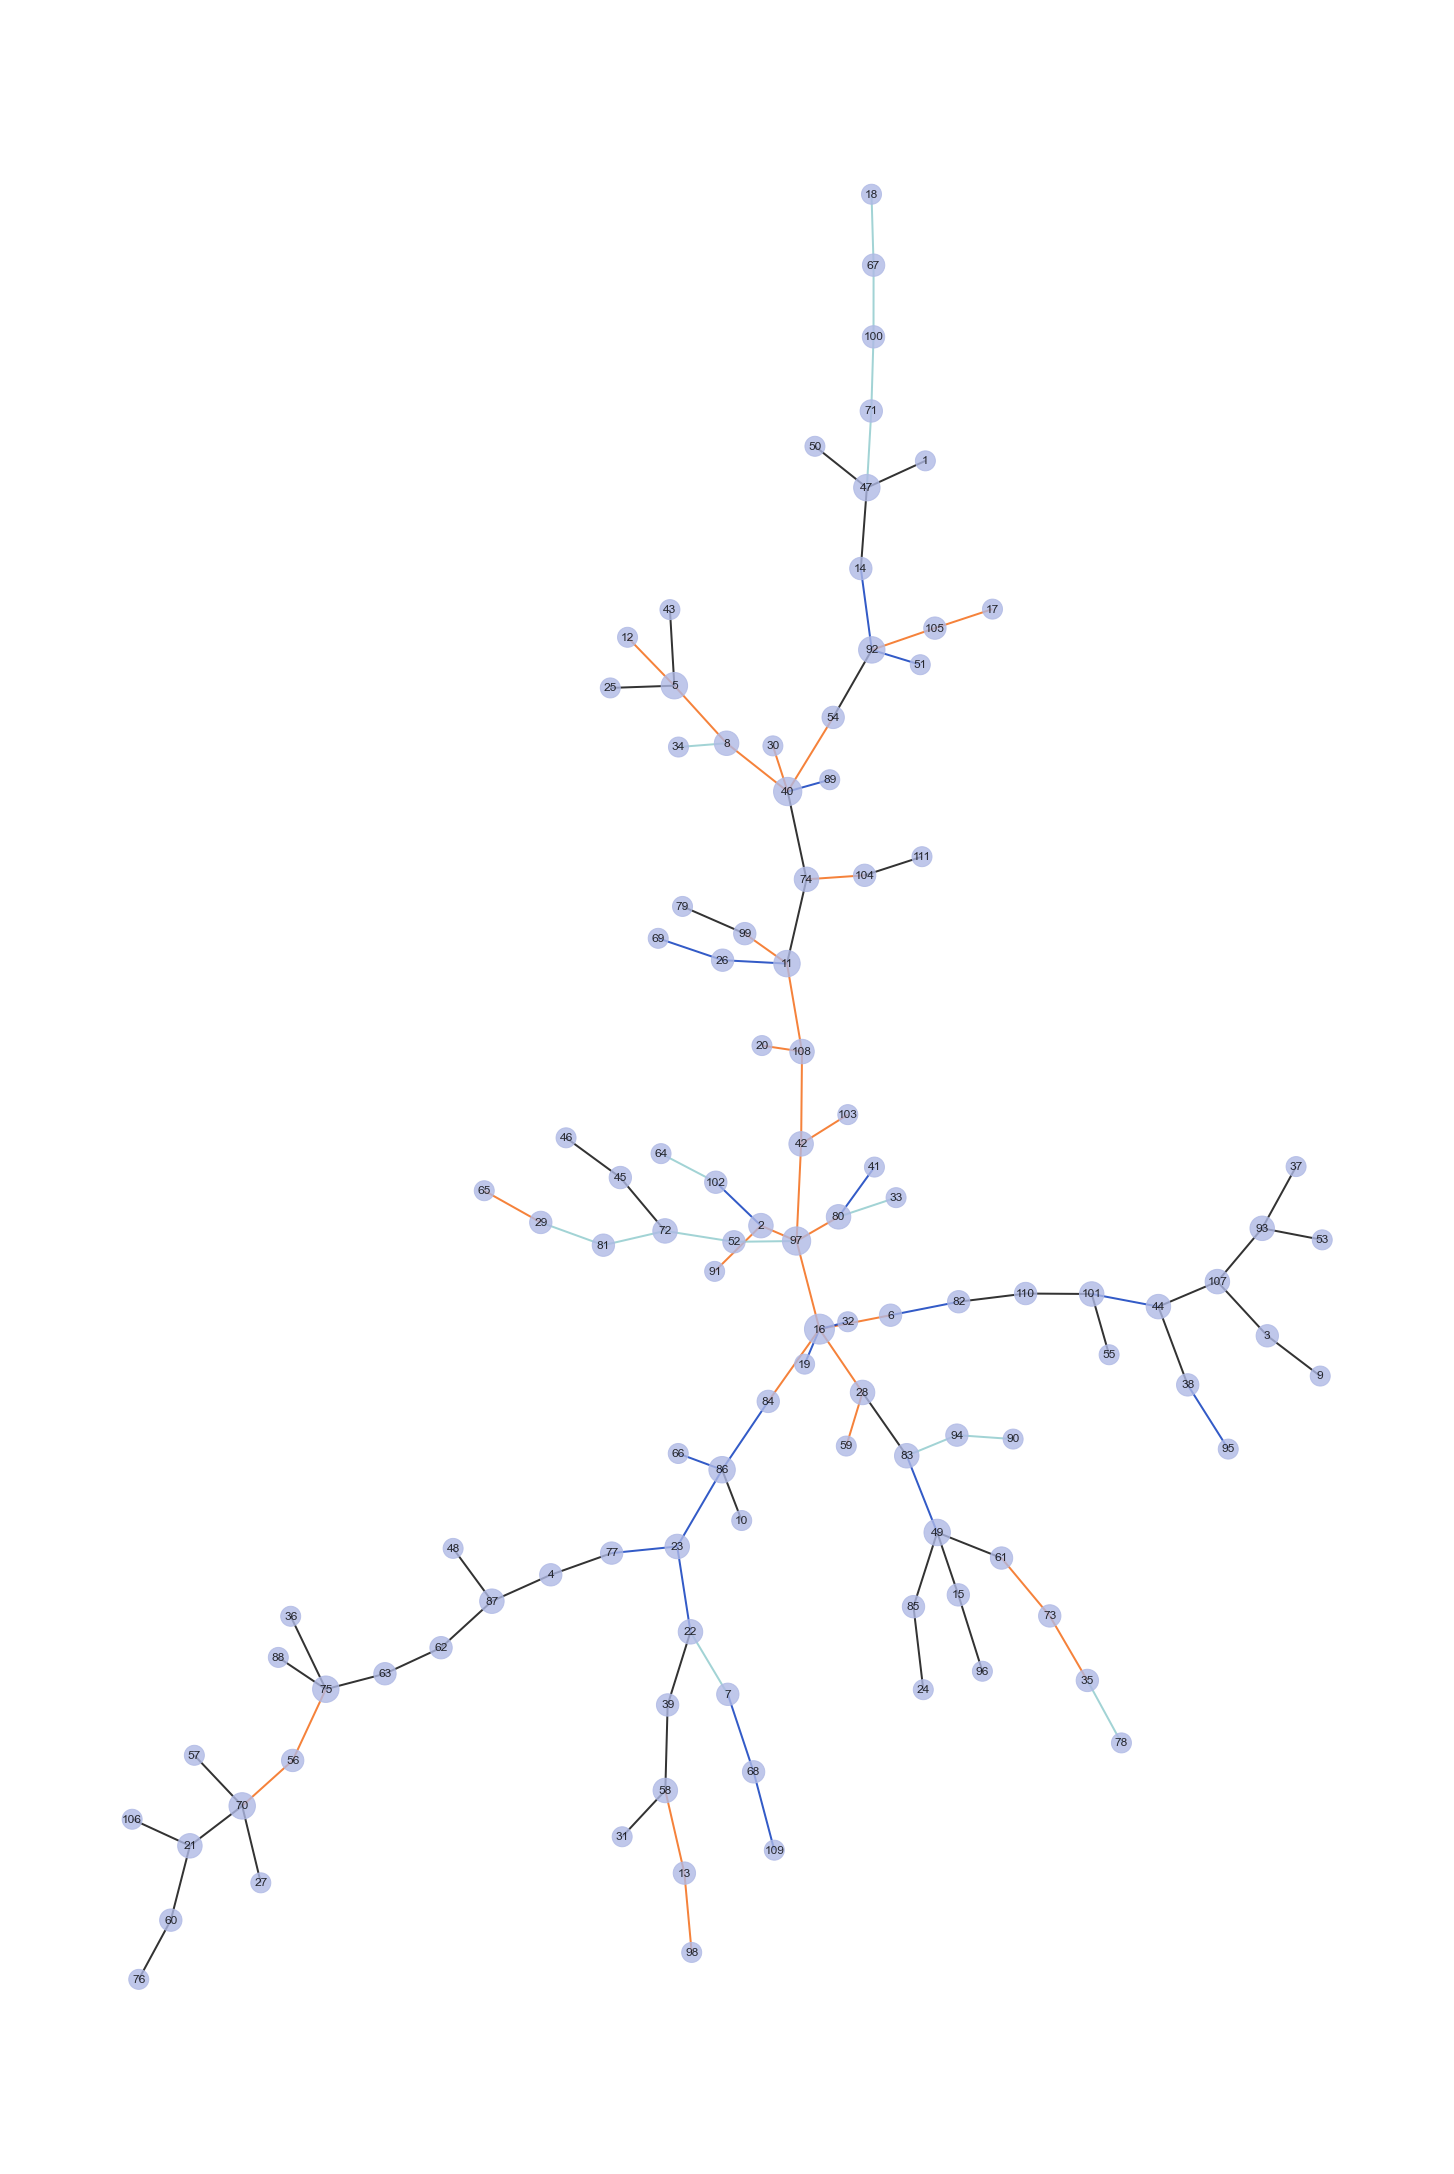

In [39]:
# try shuffle
# sludge MST figure results

import networkx as nx
import matplotlib.pyplot as plt




import pandas as pd 
ad_matrix = pd.read_csv("sludge_mst_smilarity-modified.csv")
ad_matrix.fillna(0,inplace=True)
ad_matrix = ad_matrix.iloc[:,1:]
adjcent_matrix = ad_matrix.values



G = nx.DiGraph()
for i in range(1,111+1):
    G.add_node(i)

n = len(adjcent_matrix)
m = len(adjcent_matrix[0])
links = []
for i in range(n):
    for k in range(n):
        if adjcent_matrix[i][k]!=0:
            links.append([i,k,adjcent_matrix[i][k]])
#shuffle(links)
for i,k,sim in links[::-1]:
    if sim>=0.75:
        j = 0
    elif sim>=0.5:
        j = 1
    elif sim>0.25:
        j = 2
    else:
        j = 3
    color_index = ["#000000","#0032B9","#F3630A","#8BC9CB"]
    selected_color = color_index[j]
    G.add_edge(i+1,k+1,weight = sim,color = selected_color)


edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

pos = nx.nx_agraph.graphviz_layout(G) ##, prog='fdp'
plt.figure(figsize=(20,30))

degree = dict(nx.degree(G))
nx.draw(G,pos, arrows = False,with_labels=True,nodelist=degree.keys(),ax = None, node_size=[300+v*100 for v in degree.values()],
edge_color = colors,width = 2,font_size = 12,font_weight='light',node_color = '#AFB9E5',alpha =.8)
plt.grid('on')
plt.show()


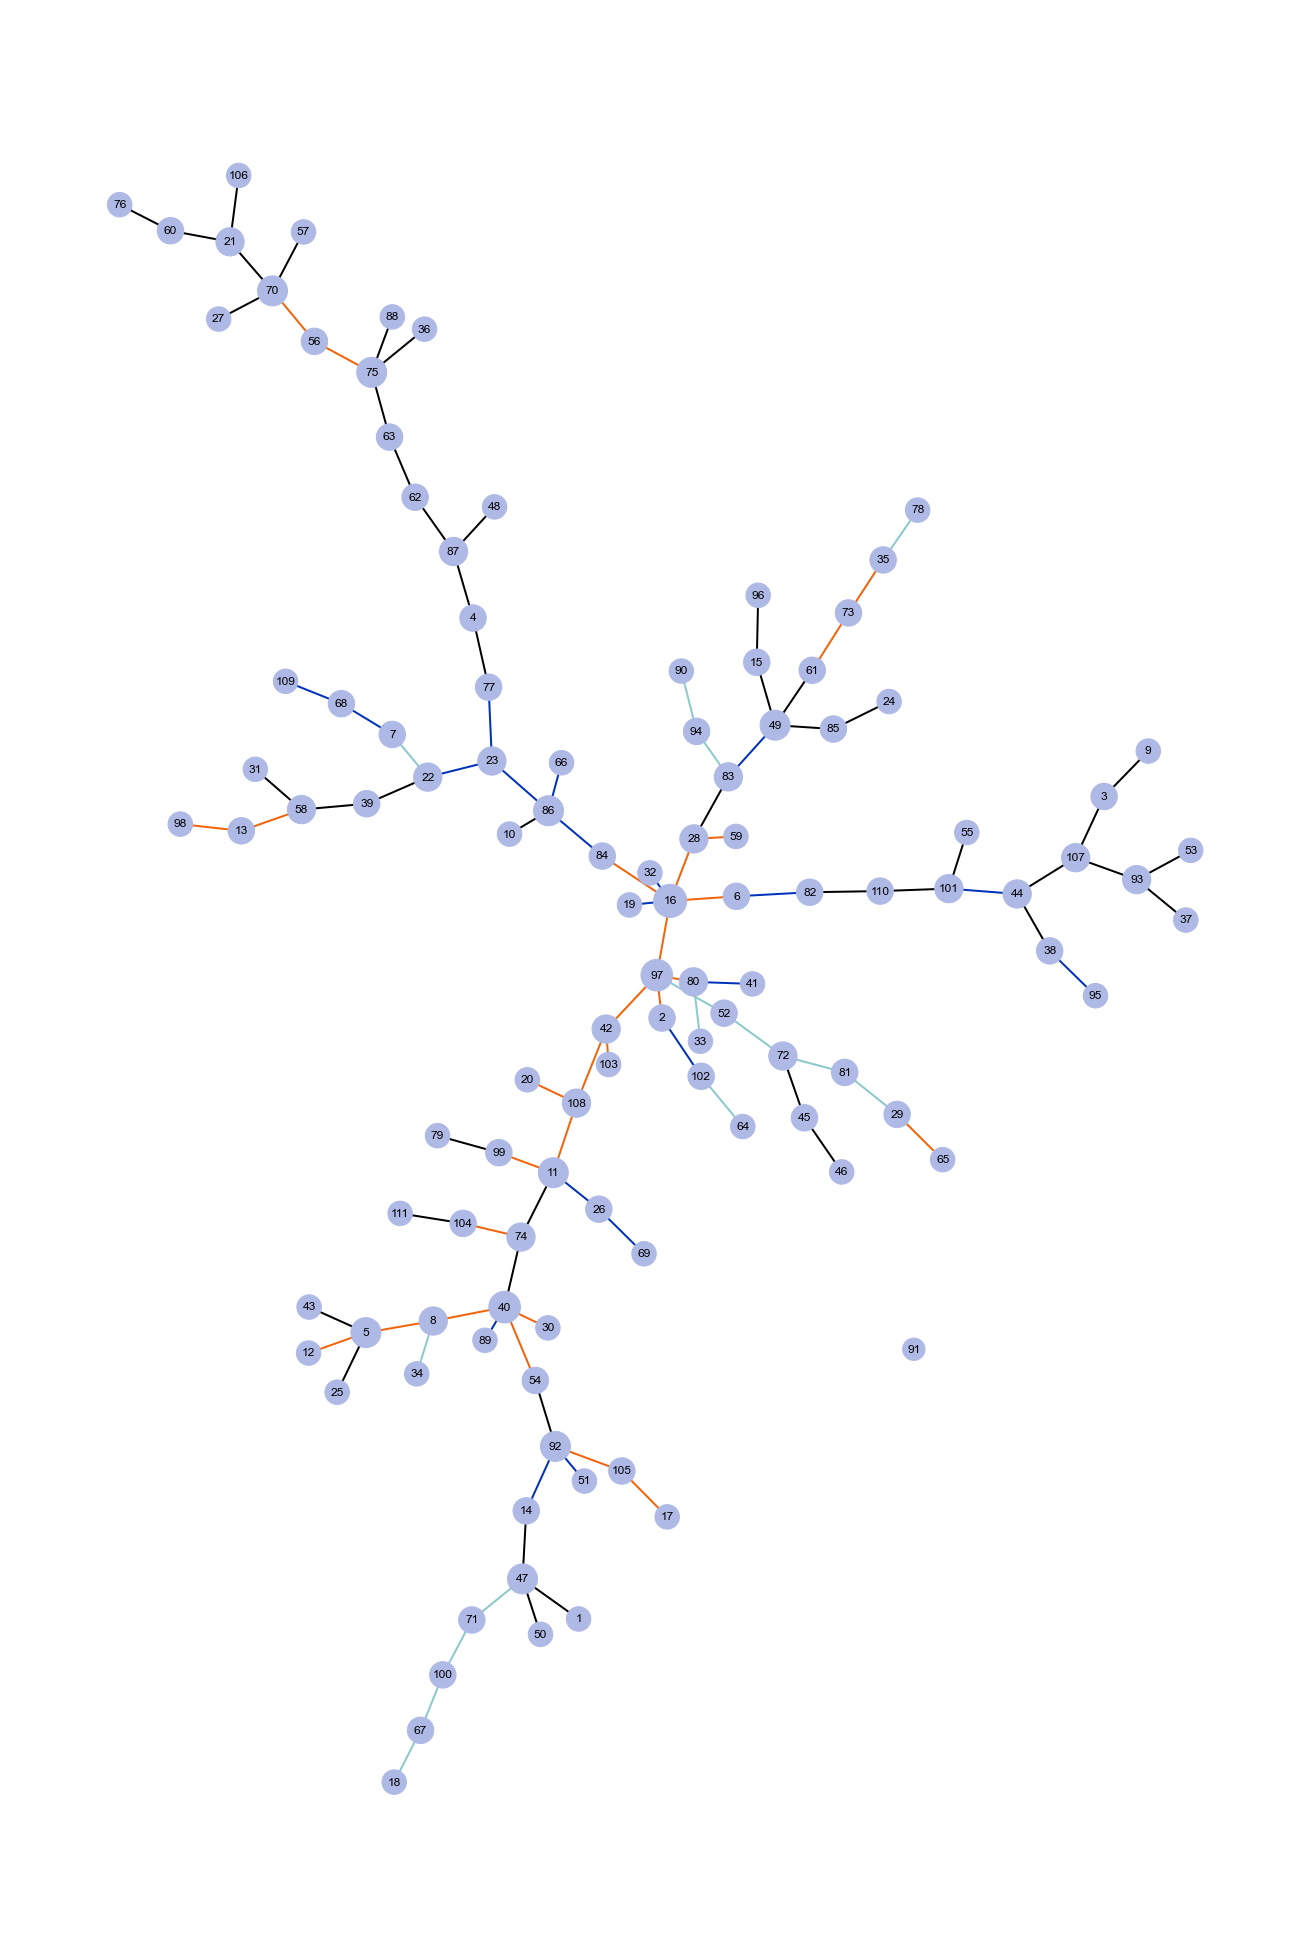

In [50]:
# sludge MST figure results

import networkx as nx
import matplotlib.pyplot as plt




import pandas as pd 
ad_matrix = pd.read_csv("sludge_mst_smilarity-modified-nono91.csv")
ad_matrix.fillna(0,inplace=True)
ad_matrix = ad_matrix.iloc[:,1:]
adjcent_matrix = ad_matrix.values



G = nx.DiGraph()
for i in range(1,111+1):
    G.add_node(i)

n = len(adjcent_matrix)
m = len(adjcent_matrix[0])
for i in range(n):
    for k in range(n):
        if adjcent_matrix[i][k]!=0:
            j = 0
            sim = adjcent_matrix[i][k]
            if sim>=0.75:
                j = 0
            elif sim>=0.5:
                j = 1
            elif sim>0.25:
                j = 2
            else:
                j = 3
            color_index = ["#000000","#0032B9","#F3630A","#8BC9CB"]
            selected_color = color_index[j]
            G.add_edge(i+1,k+1,weight = adjcent_matrix[i][k],color = selected_color)


edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

pos = nx.nx_agraph.graphviz_layout(G) ##, prog='fdp'
plt.figure(figsize=(18,27))

degree = dict(nx.degree(G))
nx.draw(G,pos, arrows = False,with_labels=True,nodelist=degree.keys(),ax = None, node_size=[500+v*100 for v in degree.values()],
edge_color = colors,width = 2,font_size = 12,font_weight='light',node_color = '#AFB9E5',alpha =1)
plt.grid('on')
plt.show()

# Sediment-form csv

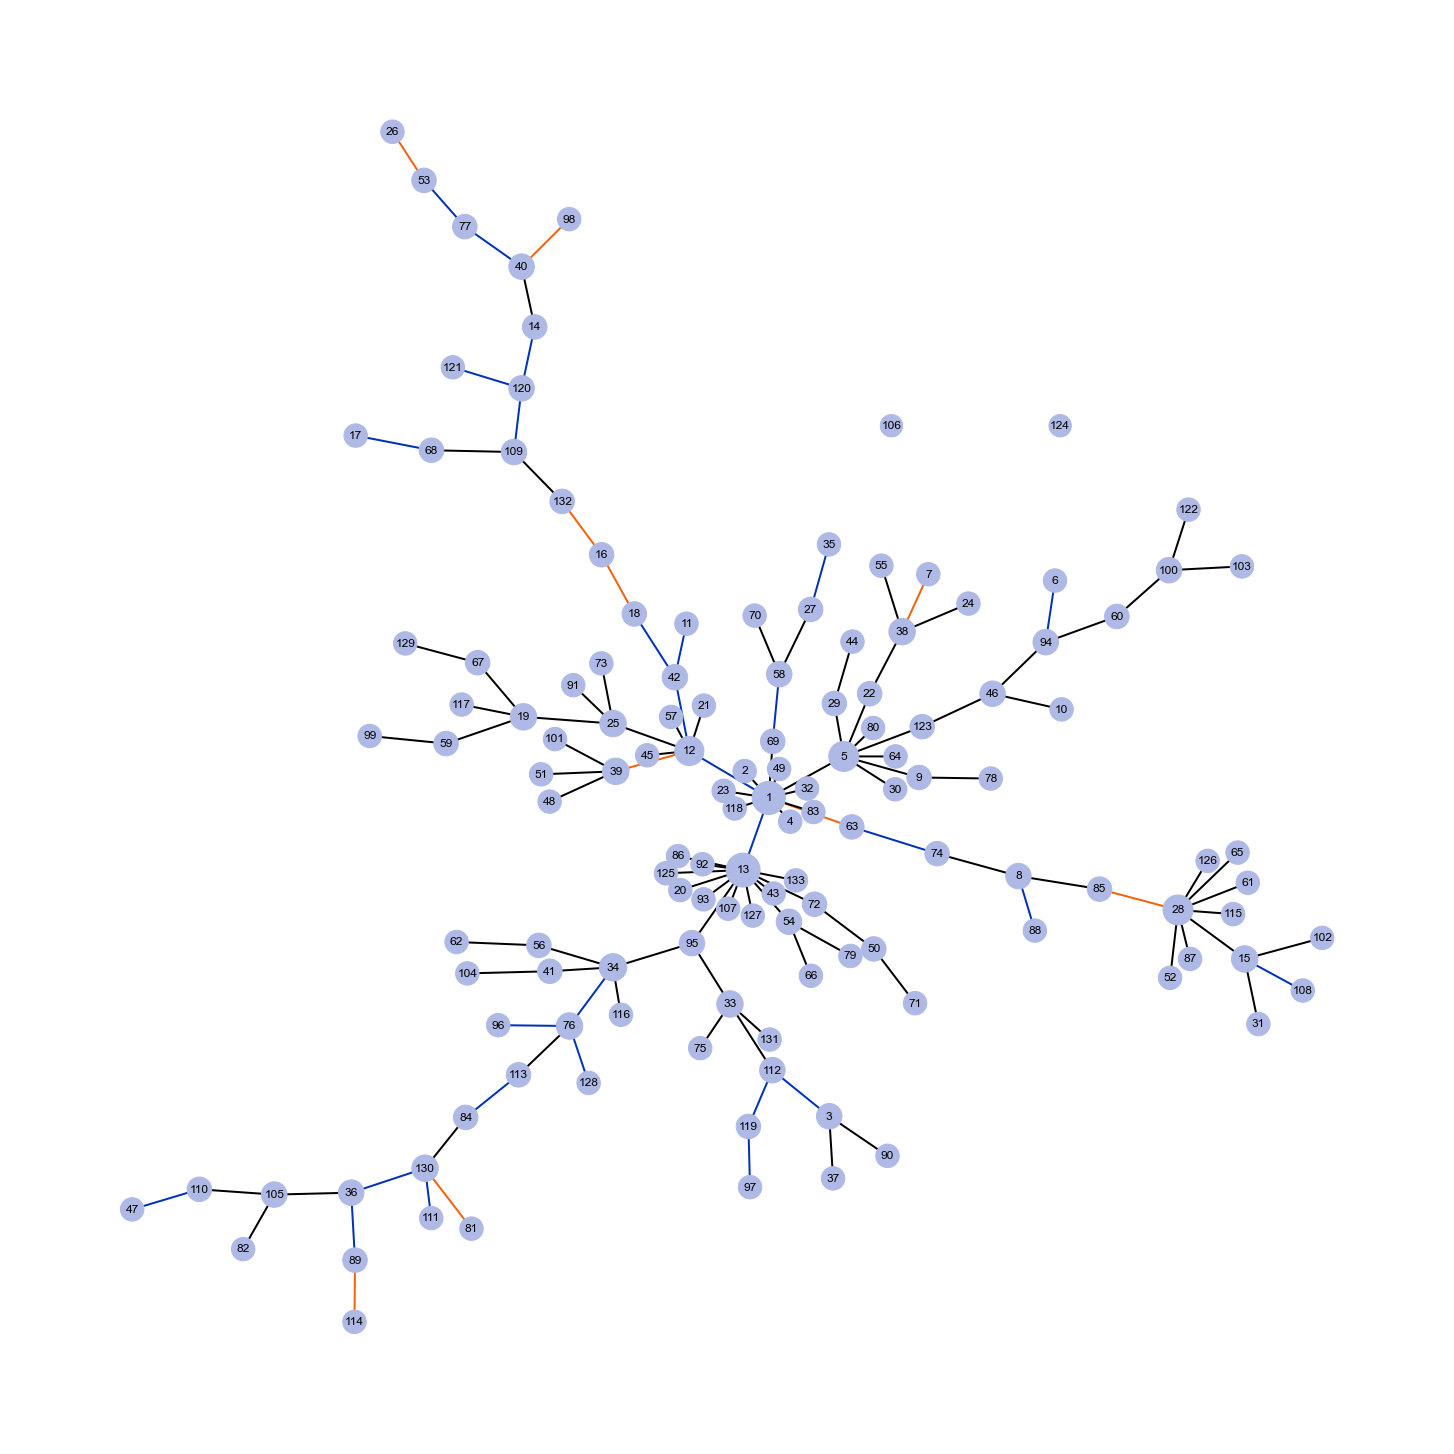

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd 
ad_matrix = pd.read_csv("mst_smilarity-no35.csv")
ad_matrix.fillna(0,inplace=True)
ad_matrix = ad_matrix.iloc[:,1:]
adjcent_matrix = ad_matrix.values




G = nx.DiGraph()
for i in range(1,132+1):
    G.add_node(i)

n = len(adjcent_matrix)
m = len(adjcent_matrix[0])
for i in range(n):
    for k in range(m):
        if adjcent_matrix[i][k]!=0:
            j = 0
            sim = adjcent_matrix[i][k]
            if sim>=0.75:
                j = 0
            elif sim>=0.5:
                j = 1
            elif sim>0.25:
                j = 2
            else:
                j = 3
            color_index = ["#000000","#0032B9","#F3630A","#8BC9CB"]
            selected_color = color_index[j]
            G.add_edge(i+1,k+1,weight = adjcent_matrix[i][k],color = selected_color)


edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

pos = nx.nx_agraph.graphviz_layout(G) ## prog='fdp',root = '26'

# gc, tred, fdp, gvcolor, dot, gvpr, neato, patchwork, acyclic, circo, nop, sfdp, sccmap, osage, ccomps, unflatten, twopi.

plt.figure(figsize=(20,20))

degree = dict(nx.degree(G))
nx.draw(G,pos, arrows = False,with_labels=True,nodelist=degree.keys(),ax = None, \
    node_size=[500+v*50 for v in degree.values()],edge_color = colors,\
    width = 2,font_size = 12,font_weight='light',node_color = '#AFB9E5',alpha =1)
#plt.grid('on')
plt.show()

In [204]:
import os 
path = './selected-fig/'
name = list(os.listdir(path))

FileNotFoundError: [WinError 3] The system cannot find the path specified: './selected-fig/'

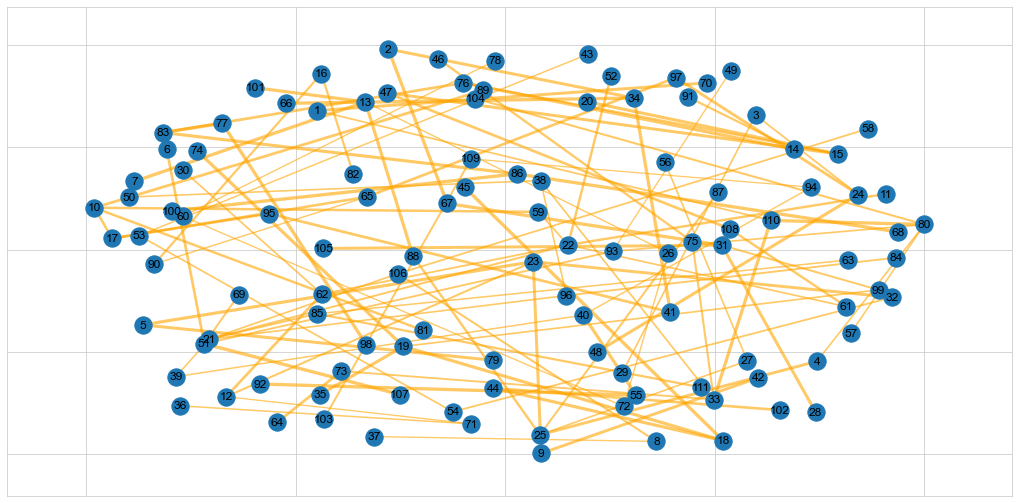

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
n = len(links)
G = nx.DiGraph()
for i in range(1,n+1):
    G.add_node(str(i))
for edge in links:
    G.add_edge(str(edge[0]),str(edge[1]),weight = 2.718**(1.2-edge[-1]))
widths = nx.get_edge_attributes(G, 'weight')
plt.figure(figsize=(18,9))
pos = nx.spring_layout(G,k=0.5,iterations=20)

nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos,edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='orange',
                       alpha=0.6, arrows = False)

plt.show()

[0]


# Plot with plotly

In [88]:
import plotly.graph_objects as go
import networkx as nx
import random
n = len(links)
G = nx.DiGraph()
for i in range(1,n+2):
    G.add_node(str(i),pos =(random.gauss(0, 3), random.gauss(0, 3)))
for edge in links:
    G.add_edge(str(edge[0]),str(edge[1]),weight = 2.718**(1.2-edge[-1]))
    


In [71]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [89]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [90]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [91]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [103]:
# Using a queue to automaticly divide chemical into different groups
n = len(links)
#p = list(range(0,n+3))
def splting(q):
    global p
    def find(x):
        if p[x]!=x: p[x] = find(p[x])
        return p[x]
    node_list = []
    for a,b,_ in q:
        if find(a)==find(b):
            continue
        p[find(a)]=find(b)
        node_list.append(a)
        node_list.append(b)
    return [find(i) for i in set(node_list)]

def bi_split(parent,q_links):

    group_set = set(parent)
    groups = []
    for ele in group_set:
        sub_gp = []
        for lk in q_links:
            a,b,_ = lk
            if find(a) ==ele :
                sub_gp.append(lk)
        groups.append(sub_gp)

    return groups
   
links.sort(key = lambda ls:ls[-1])
qe = [links[:]]
final_groups = []
while qe:
    temp = []
    for q in qe:
        if len(q)<45 and q:
            final_groups.append(q)    
        else:
            q.sort(key = lambda ls:ls[-1])
            q.pop(-1)
            p = list(range(0,n+3))
            parent = splting(q)
            q_group = bi_split(parent,q)
            temp.extend(q_group)        
    qe = temp
    temp = [] 

In [105]:
re_group = []
temp = []
for group in final_groups:
    
    if len(group)>10:
        re_group.append(group)
    else:
        temp.append(group)
re_group.append(temp)

    #print(group)

In [ ]:
for group in re_group:
    print(len(group))

# Drawing images using smiles from certain group

In [ ]:
from rdkit.Chem import Draw

sls = [smiles[0],smiles[10],smiles[11]]
mols = [Chem.MolFromSmiles(sl) for sl in sls]
Draw.MolsToGridImage(mols)

# Using the center of a tree as the cutting points

In [ ]:
# the center of a tree
M = 2*n+5
h = [-1]*M
ne = [0]*M
e = [0]*M
w = [0]*M
st = [0]*(n+3)
idx = 0
ans = c
def add(a,b,c):
    global idx
    e[idx] =b
    ne[idx] = h[a]
    h[a] = idx
    w[idx] = c
    idx+=1

def dfs(u):
    global ans
    st[u] = 1
    res = 0
    i = h[u]
    sums = w[i]
    while i!=-1:
        j = e[i]
        if not st[j]:
            s = dfs(j)
            res = max(res,s)
            sums+=s
        i = ne[i]
    res = max(res, c-sums)
    ans = min(ans,res)
    return sums
for (a,b,c) in links:
    add(a,b,c),add(b,a,c)
dfs(1)

In [ ]:
def dfs(u):
    st[u] =1
    res = 0;sums =1
    i = h[u]
    while i!=-1:
        j = e[i]
        if not st[j]:
            s= dfs(j)
            res = (res,s)
            sums+=s

        i = ne[i]
    res = max(res,n-sums)
    sums = min(ans,res)
    return sums

3